## US-Accident Analysis - EDA

### EDA Objective:

### 📉Analysing Accidents Dataset for following purposes:

- Locations(Cities/States) where accidents happen most.
- What time of day most accidents happen?
- which months have most accidents?
- Is NY in the top 10 list of most accidents states?
- which state has most cities with accidents happening?
- what is trend of accidents year over year?(Increasing/decreasing)
- Are there more accidents in warmer or cold areas
- what can be done to prevent accidents?
- Analyse accidents in NJ.
- which states has highest number of accidents? How about per capita?
- To analyse the details about what situations trigger accidents.

### Importing Dataset from kaggle

In [1]:
#pip install opendatasets --upgrade --quiet

In [2]:
# import opendatasets as od
# download_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
# od.download(download_url)

In [3]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
sns.set_style('darkgrid')

In [5]:
df=pd.read_csv(data_filename)

In [6]:
df.head(4)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


#### Percentage of missing values per column

In [9]:
df.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [10]:
missing_percentage=df.isnull().sum()/len(df)
missing_percentage[missing_percentage!=0].sort_values(ascending=False)

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Sunrise_Sunset           1.007612e-03
Civil_Twilight           1.007612e-03
Nautical_Twilight        1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

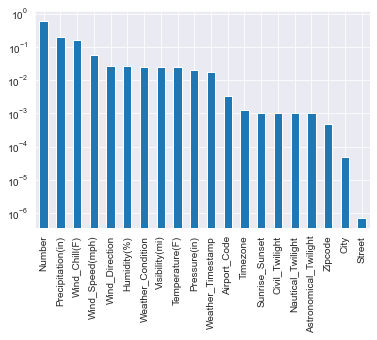

In [11]:
missing_percentage[missing_percentage!=0].sort_values(ascending=False).plot(kind='bar',logy=True)

✅Number, Precipitation, Wind_Chill, Wind_Speed has most null values

In [12]:
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day


#### Dropping unncessary columns:

In [13]:
df=df.drop(['End_Lat','End_Lng','Description','Number','Street','Side','County','Zipcode','Country','Weather_Timestamp','Wind_Chill(F)','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,State,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Dublin,OH,US/Eastern,KOSU,42.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,Dayton,OH,US/Eastern,KFFO,36.9,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,Cincinnati,OH,US/Eastern,KLUK,36.0,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,Akron,OH,US/Eastern,KAKR,39.0,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,Cincinnati,OH,US/Eastern,KLUK,37.0,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


### Exploratory Data Analysis and Visualization

Columns to be analysed 
1. City 
2. Start Time
3. Start Lat,Start Lng
4. Temperature
5. Weather Condition

### City

In [14]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [15]:
len(df['City'].unique())

11682

In [16]:
top_cities=df.groupby('City')['State'].value_counts().sort_values(ascending=False)[:15]
top_cities

City         State
Miami        FL       106896
Los Angeles  CA        68956
Orlando      FL        54654
Dallas       TX        41615
Houston      TX        39366
Charlotte    NC        32998
Sacramento   CA        32559
San Diego    CA        26627
Raleigh      NC        22837
Minneapolis  MN        22768
Portland     OR        20563
Nashville    TN        20160
Baton Rouge  LA        18182
Austin       TX        17928
Phoenix      AZ        16940
Name: State, dtype: int64

In [17]:
top_cities=pd.DataFrame(top_cities)
top_cities.index
top_cities.columns=['Accidents']
top_cities=top_cities.reset_index()

In [18]:
top_cities

,City,State,Accidents
0,Miami,FL,106896
1,Los Angeles,CA,68956
2,Orlando,FL,54654
3,Dallas,TX,41615
4,Houston,TX,39366
5,Charlotte,NC,32998
6,Sacramento,CA,32559
7,San Diego,CA,26627
8,Raleigh,NC,22837
9,Minneapolis,MN,22768


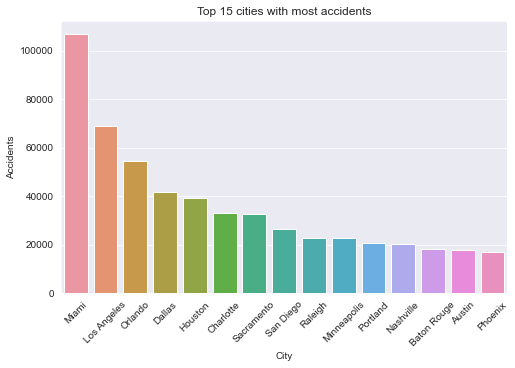

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='City',y='Accidents', data=top_cities,ci=None)
plt.xticks(rotation=45)
plt.title('Top 15 cities with most accidents')
plt.show()

In [20]:
cities=df['City'].value_counts()
cities

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

#### ✅ Results:
- Miami has most accidents, Even though it is not more populated than Los Angeles.
- New York City is not among the top list of most accident cities.

#### ❓Analysing why NY is not in the top list

In [21]:
df[df['State']=='NY']['City'].unique()[:20]

array(['New York', 'Central Valley', 'Syracuse', 'Brooklyn', 'Albany',
       'Nanuet', 'Islip Terrace', 'Peekskill', 'Bronx', 'Maspeth',
       'Yonkers', 'Valley Stream', 'Islip', 'Binghamton', 'New Rochelle',
       'Flushing', 'Queens Village', 'Monroe', 'Herkimer', 'Bellerose'],
      dtype=object)

In [22]:
# No of accidents in NY city
df[df['City']=='New York']['ID'].count()

7068

In [23]:
df['State'].value_counts()[:10] 

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

#### ✅ Results:

- New york city has accidents around 7000 and hence it is not in the top list of cities with most accidents.
- From the plot we can see that NY State is in the top 10 list when plotted State wise.

#### ❓ Analysing Accidents by State

In [24]:
accidents_by_states = df.groupby('State')['ID'].count().sort_values(ascending=False)
accidents_by_states[:15]

State
CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
Name: ID, dtype: int64

In [25]:
accidents_by_states=accidents_by_states.reset_index()
accidents_by_states[:20]

,State,ID
0,CA,795868
1,FL,401388
2,TX,149037
3,OR,126341
4,VA,113535
5,NY,108049
6,PA,99975
7,MN,97185
8,NC,91362
9,SC,89216


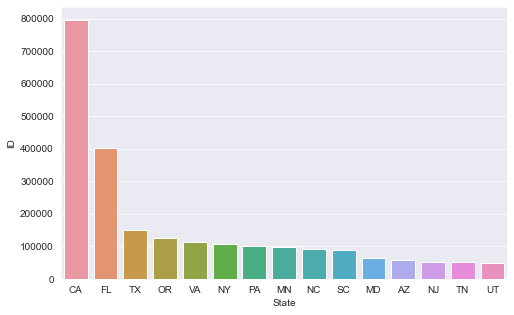

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='State',y='ID',data=accidents_by_states[:15],ci=None)
plt.show()

#### ✅Results:
- CA has most accidents.
- FL is the second state with most accidents.
- Most populated cities have most accidents.

#### ❓Analysing States having top Cities with most accidents

In [27]:
top_cities1=df.groupby(['City','State']).count()['ID'].sort_values(ascending=False)[:1000]
top_cities1

City         State
Miami        FL       106896
Los Angeles  CA        68956
Orlando      FL        54654
Dallas       TX        41615
Houston      TX        39366
                       ...  
Farmington   UT          460
Triangle     VA          460
Lakehead     CA          458
Teaneck      NJ          458
Mc Farland   CA          457
Name: ID, Length: 1000, dtype: int64

In [28]:
top_cities1=top_cities1.reset_index()

In [29]:
top_states1=top_cities1.groupby('State')['ID'].count().sort_values(ascending=False)[:10]
top_states1

State
CA    334
FL    102
OR     63
VA     49
SC     45
PA     42
MD     40
NY     32
NJ     28
UT     27
Name: ID, dtype: int64

<AxesSubplot:ylabel='ID'>

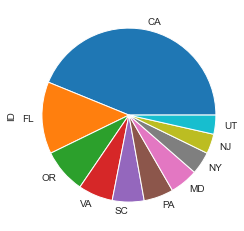

In [30]:
top_states1.plot(kind='pie')

#### ✅Results:
- From the plot we can see that CA has the cities where most accidents happen.
- The second state is FL.

### Start Time:

In [31]:
df['Start_Time']=pd.to_datetime(df.Start_Time)

In [32]:
# To convert Start_Time from different timezones to eastern for analysis
df['starttime_est'] = \
(df.groupby(['Timezone'])['Start_Time']  
                      .apply(lambda x: x.dt.tz_localize(x.name,
                      ambiguous='NaT').dt.tz_convert('US/Eastern')))

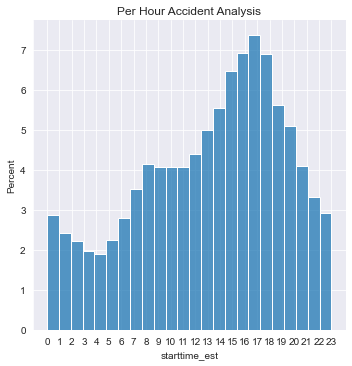

In [33]:
g=sns.displot(df,x=df['starttime_est'].dt.hour,bins=24,stat="percent").set(title='Per Hour Accident Analysis');
g.set(xticks=np.arange(0,24));

#### ✅ Results:

- From the plot we can see that most accidents happen between 3pm to 6pm.
- Probably accidents happen while going back home. 
- Least accidents happen in the early morning before 6am.

In [34]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

In [35]:
df['Timezone'].value_counts()

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64

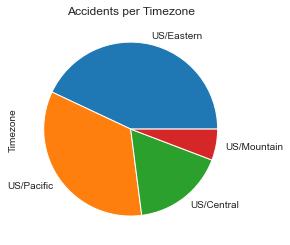

In [36]:
df['Timezone'].value_counts().plot(kind='pie',normalize=True,title='Accidents per Timezone');

#### ✅ Results:

- We can see that we have most accidents in Eastern Timezone and then comes US/Pacific.
- Least accidents in US/Mountain Timezone (May be because of less citites from US/Mountain)

In [37]:
#df.groupby('Timezone')['City'].nunique().sort_values(ascending=False)

In [38]:
#f.groupby('Timezone')['City'].nunique().sort_values(ascending=False).plot(kind='pie',normalize=True,title='Number of cities per timezone');

#### Analysis per Timezone:

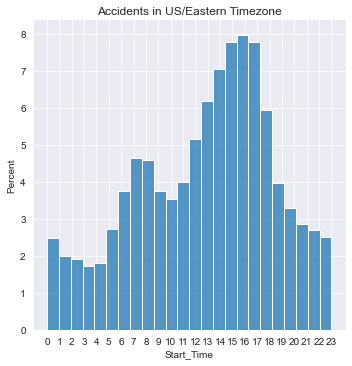

In [39]:
g=sns.displot(df,x=df[df['Timezone']=='US/Eastern']['Start_Time'].dt.hour,bins=24,stat="percent").set(title='Accidents in US/Eastern Timezone');
g.set(xticks=np.arange(0,24));

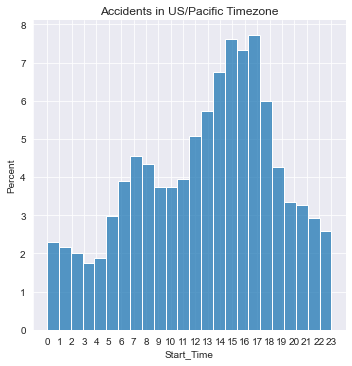

In [40]:
g=sns.displot(df,x=df[df['Timezone']=='US/Pacific']['Start_Time'].dt.hour,bins=24,stat="percent").set(title='Accidents in US/Pacific Timezone');
g.set(xticks=np.arange(0,24));

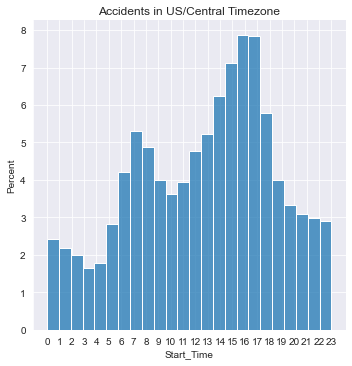

In [41]:
g=sns.displot(df,x=df[df['Timezone']=='US/Central']['Start_Time'].dt.hour,bins=24,stat="percent").set(title='Accidents in US/Central Timezone');
g.set(xticks=np.arange(0,24));

#### ✅Results:

- Most accidents happen between 2pm to 5pm 
- Least happen during early morning before 6am.

#### Analysis on Accidents - days of week:

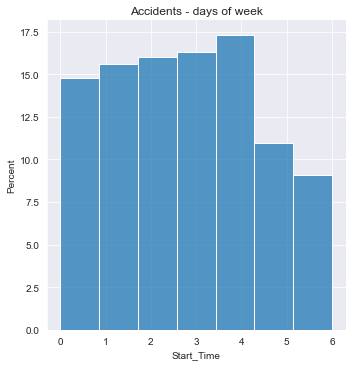

In [42]:
g=sns.displot(df,x=df['Start_Time'].dt.dayofweek,bins=7,kde=False,stat="percent").set(title='Accidents - days of week');
g.set(xticks=np.arange(0,7));

#### ✅Results: 
- The day of the week with Monday=0, Sunday=6.
- Most accidents happen on Friday and Least on Saturdays and sundays compared to week days.
- Probably most accidents happen on friday on hurry to go back home.

#### Analysing the distribution of accidents on weekdays and weekends

In [43]:
weekends_starttime=df.Start_Time[df.Start_Time.dt.dayofweek.isin([5,6])]
weekends_starttime

147       2016-02-13 04:56:20
148       2016-02-13 07:14:41
149       2016-02-13 09:13:49
150       2016-02-13 16:00:59
151       2016-02-13 18:06:41
                  ...        
2843130   2019-08-18 23:24:10
2843169   2019-08-17 03:36:35
2843243   2019-08-18 22:56:56
2843244   2019-08-18 22:56:56
2843282   2019-08-18 22:54:41
Name: Start_Time, Length: 570965, dtype: datetime64[ns]

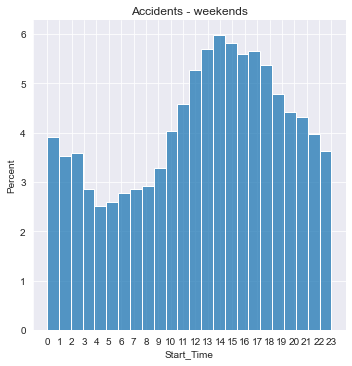

In [44]:
g=sns.displot(df,x=weekends_starttime.dt.hour,bins=24,stat="percent").set(title='Accidents - weekends');
g.set(xticks=np.arange(0,24));

#g=sns.distplot(weekends_starttime,bins=7,kde=False);

#### ✅Results:

- On weekends, Accidents happen between 12pm to 6pm and least accidents before 10am in the morning.

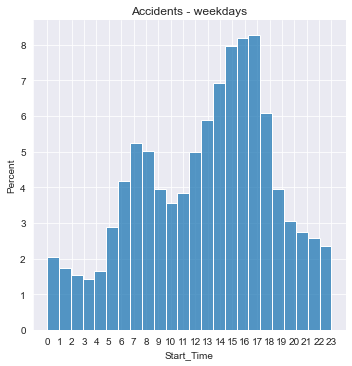

In [45]:
weekdays_starttime=df.Start_Time[df.Start_Time.dt.dayofweek.isin([0,1,2,3,4])]
g=sns.displot(df,x=weekdays_starttime.dt.hour,bins=24,stat="percent").set(title='Accidents - weekdays');
g.set(xticks=np.arange(0,24));

#### ✅ Results:
- unlike weekends, on weekdays accidents happen between 2pm to 6pm and least before 6 am.
- As analysed, Accidents happen on hurry to back home.

#### Monthwise Analysis:

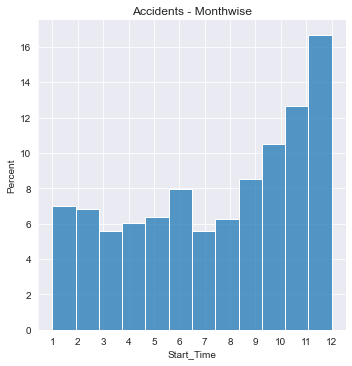

In [46]:
#sns.distplot(df['Start_Time'].dt.month,bins=12,kde=False,norm_hist=True)

g=sns.displot(df,x=df['Start_Time'].dt.month,bins=12,kde=False,stat="percent").set(title='Accidents - Monthwise');
g.set(xticks=np.arange(1,13));

#### Results:

- Most accidents happen during November and December (Peak shopping period- Christmas, Thanks giving, Black Friday).
- Least accidents happen on july.

#### Yearwise - Analysis:

In [47]:
df['Start_Time'].dt.year.unique()

array([2016, 2017, 2021, 2020, 2018, 2019], dtype=int64)

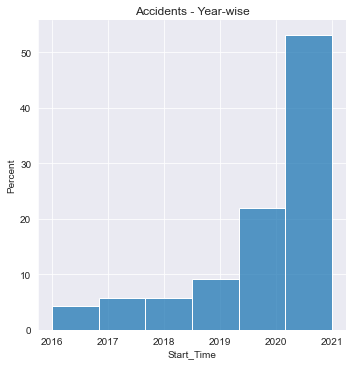

In [48]:
g=sns.displot(df,x=df['Start_Time'].dt.year,bins=6,kde=False,stat="percent").set(title='Accidents - Year-wise');
#g.set(xticks=np.arange(1,6));

- The number of accidents overall have been increasing during the past few years.
- 2021 has the most number of accidents.

### Start Latitude and Longitude:

In [49]:
df[['Start_Lat','Start_Lng']]

,Start_Lat,Start_Lng
0,40.108910,-83.092860
1,39.865420,-84.062800
2,39.102660,-84.524680
3,41.062130,-81.537840
4,39.172393,-84.492792
...,...,...
2845337,34.002480,-117.379360
2845338,32.766960,-117.148060
2845339,33.775450,-117.847790
2845340,33.992460,-118.403020


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

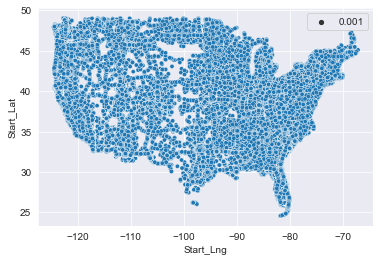

In [50]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat, size=0.001)

In [51]:
import folium
from folium.plugins import HeatMap
HeatMap(lat_lng_pairs).add_to(hmap)
hmap
Make this Notebook Trusted to load map: File -> Trust Notebook

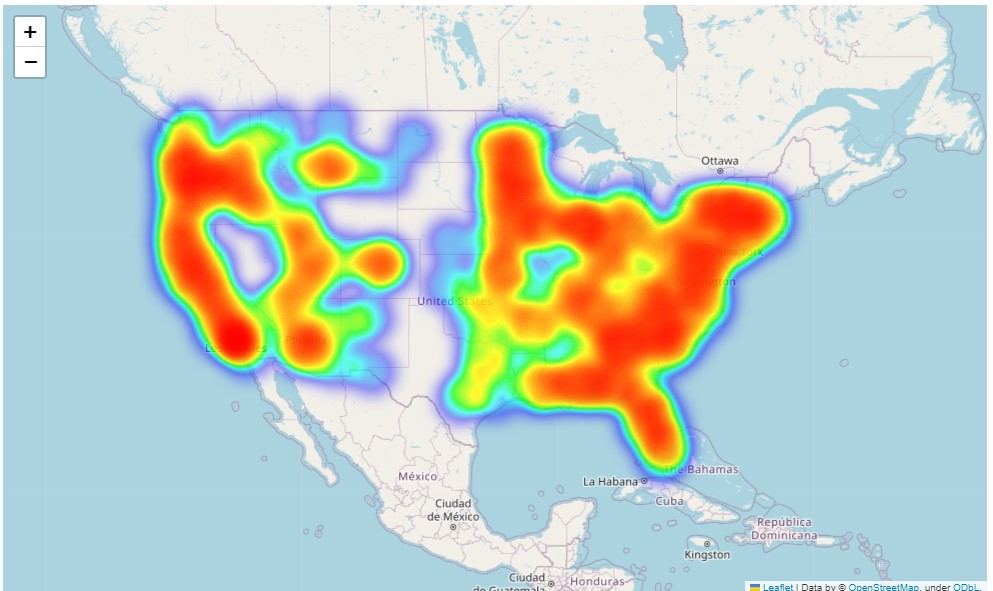

In [54]:
sample_df=df.sample(int(0.001*len(df)))
lat_lng_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
hmap=folium.Map()

In [56]:
HeatMap(lat_lng_pairs).add_to(hmap)
hmap
#Please check the folium_map.png for folium map

#### ✅Results:

- From the map we can see that costal areas have most accidents.

### Weather condition:

In [ ]:
df['Weather_Condition'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
df['Weather_Condition'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

#### Results:

- Most accidents happened duirng Fair weather. so in particular Weather condition doesnt cause accidents.

### Bump:

#### Does having bump reduces the number of accidents:

In [ ]:
df['Bump'].value_counts()

In [ ]:
df['Bump'].value_counts().plot(kind='pie')

#### ✅ Results:

- From the plot we can see that most accidents happen when there are no bumps.
- We can reduce the number of accidents by adding more bumps.

### Roundabout:

In [ ]:
df['Roundabout'].value_counts()

#### Result:
- We can see that there were no roundabouts nearby.
- Adding Roundabouts can help to decrease the number of accidents.

###  Stop Sign:

In [ ]:
df['Stop'].value_counts()

#### Results:

- We can see that adding more stop sign can help to reduce the number of accidents.

#### Summary and Conclusion:

- Miami and Los Angels are having most accidents.
- California and Florida has most accidents state-wise probably because of population. 
- Most accidents happen between 3pm to 6pm probably while coming back home.
- Least number of accidents happen before 6am
- Year by year the number of accidents have been increasing and Most accidents happened in year 2019.
- Most accidents happen on Fridays and least happen on weekends.
- Many precautions canbe taken in order to reduce the number of accidents:
1. Adding more bumps.
2. Adding more roundabouts.
3. Adding more stops.
4. Adding more Traffic signals.

Still there is so much scope for analysis. We can analyse on precipitation, Wind_Speed, visibility, Humidity etc. Due to time constraints I am limiting myself to this.